# Projet de simulation numérique - Brusselator
####   Quentin Lalou - Jonathan Magérus

## Brusselator 0D

Nous considérons le système suivant :
$$ \frac{du}{dt} = A + u^2 v - Bu - u$$
$$ \frac{dv}{dt} = Bu - u^2 v$$

### Approche théorique

Tout d'abord, essayons de déterminer les équilibres du système. On a $Bu - u^2v = 0$, et donc, $u = 0$ ou $B = uv$. En réinjectant nos résultat dans $A + u^2v - Bu - u = 0$, on trouve un équilibre au point $p = (A,\frac{B}{A})$. La jacobienne du système au point d'équilibre est égal à :

$$ J(p) = \begin{pmatrix} B - 1 & A^2 \\ -B & -A^2 \end{pmatrix}$$

Les valeurs propres de cette matrice sont égales à $\lambda_{\pm} = \frac{1}{2} ( \pm \sqrt{(A^2 - B + 1)^2 - 4A^2} - A^2 + B -1)$.
On remarque que $Re(\lambda_{\pm}) \leq 0$ pour $B \leq 1 + A^2$. Notre équilibre est donc stable et devient instable pour $B > 1 + A^2$.

### Méthode numérique

Faisons un premier essai de ce système en utilisant simplement la méthode d'euler avant, avec u = v = 0 et A = B = 1 :

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def dudt(u,v,A,B) :
    der_u = A + v*u**2 - B*u - u
    return der_u

def dvdt(u,v,A,B) :
    der_v = B*u - v*u**2
    return der_v

def eul_av(A,B,u_0,v_0, t_f, N) :
    h = t_f/N
    u = [u_0]
    v = [v_0]
    t = np.linspace(0,t_f,N+1)
    for i in range(N) :
        u.append(u[-1] + h*dudt(u[-1],v[-1],A,B))
        v.append(v[-1] + h*dvdt(u[-1],v[-1],A,B))
    return u,v,t

Text(0, 0.5, 'composant v')

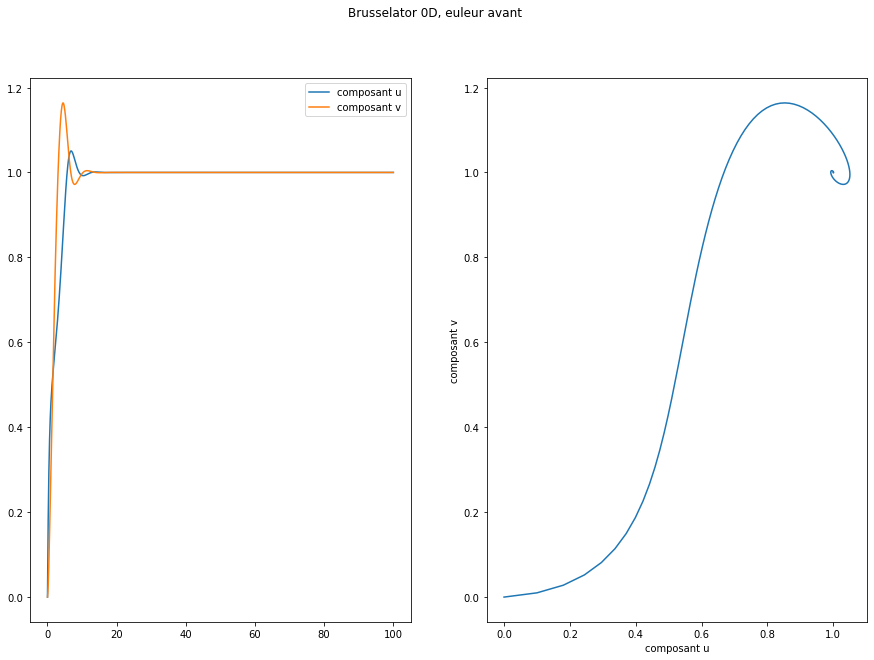

In [4]:
u,v,t = eul_av(1,1,0,0,100,1000)

fig1 = plt.figure(figsize = (15,10))
fig1.suptitle('Brusselator 0D, euleur avant')
ax1 = fig1.add_subplot(121)
ax1.plot(t,u,label = 'composant u')
ax1.plot(t,v,label = 'composant v')
plt.legend()

ax2 = fig1.add_subplot(122)
ax2.plot(u,v)
plt.xlabel('composant u')
plt.ylabel('composant v')

On remarque bien un équilibre stable au point $p = (A,B/A) =(1,1)$. On peut d'ailleurs voir que ce comportement ne dépend pas des conditions initiales sur u et v.

Text(0, 0.5, 'composant v')

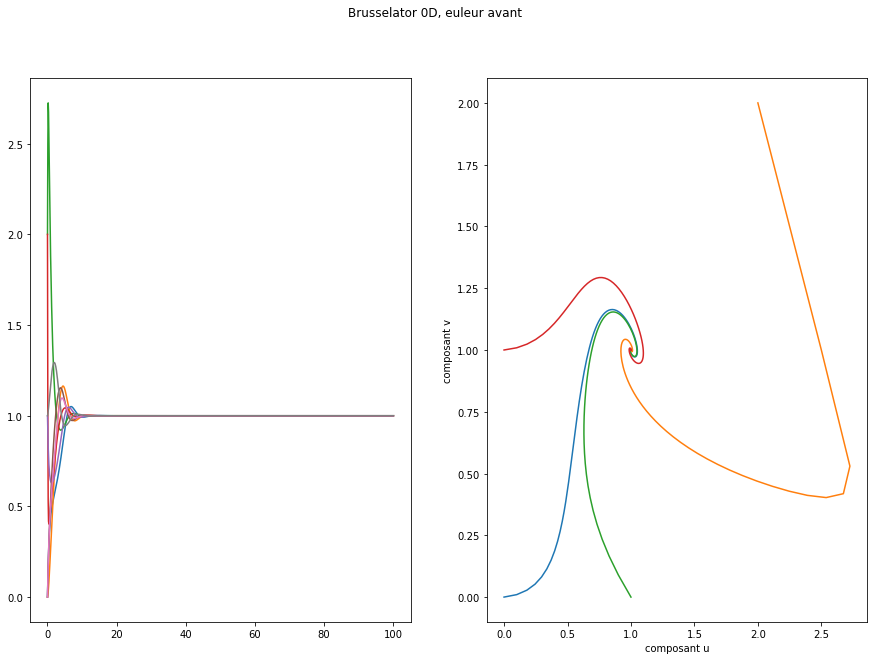

In [5]:
a,b,t = eul_av(1,1,0,0,100,1000)
c,d,t = eul_av(1,1,2,2,100,1000)
e,f,t = eul_av(1,1,1,0,100,1000)
g,h,t = eul_av(1,1,0,1,100,1000)

fig1 = plt.figure(figsize = (15,10))
fig1.suptitle('Brusselator 0D, euleur avant')
ax1 = fig1.add_subplot(121)
ax1.plot(t,a)
ax1.plot(t,b)
ax1.plot(t,c)
ax1.plot(t,d)
ax1.plot(t,e)
ax1.plot(t,f)
ax1.plot(t,g)
ax1.plot(t,h)

ax2 = fig1.add_subplot(122)
ax2.plot(a,b)
ax2.plot(c,d)
ax2.plot(e,f)
ax2.plot(g,h)
plt.xlabel('composant u')
plt.ylabel('composant v')

Essayons maintenant en posant B = 3. Comparons cette fois-ci la méthode d'euler ainsi que celle de Runge-Kutta.

In [7]:
def rk4(A,B,u_0,v_0, t_f, N) :
    h = t_f/N
    u = [u_0]
    v = [v_0]
    t = np.linspace(0,t_f,N+1)
    for i in range(N) :
        k1 = h*dudt(u[-1],v[-1],A,B)
        j1 = h*dvdt(u[-1],v[-1],A,B)
        k2 = h*dudt(u[-1] + k1/2,v[-1] + j1/2,A,B)
        j2 = h*dvdt(u[-1] + k1/2,v[-1] + j1/2,A,B)
        k3 = h*dudt(u[-1] + k2/2,v[-1] + j2/2,A,B)
        j3 = h*dvdt(u[-1] + k2/2,v[-1] + j2/2,A,B)
        k4 = h*dudt(u[-1] + k3,v[-1] + j3,A,B)
        j4 = h*dvdt(u[-1] + k3,v[-1] + j3,A,B)
        u.append(u[-1] + (k1 + 2*k2 + 2*k3 + k4)/6)
        v.append(v[-1] + (j1 + 2*j2 + 2*j3 + j4)/6)
    return u,v,t

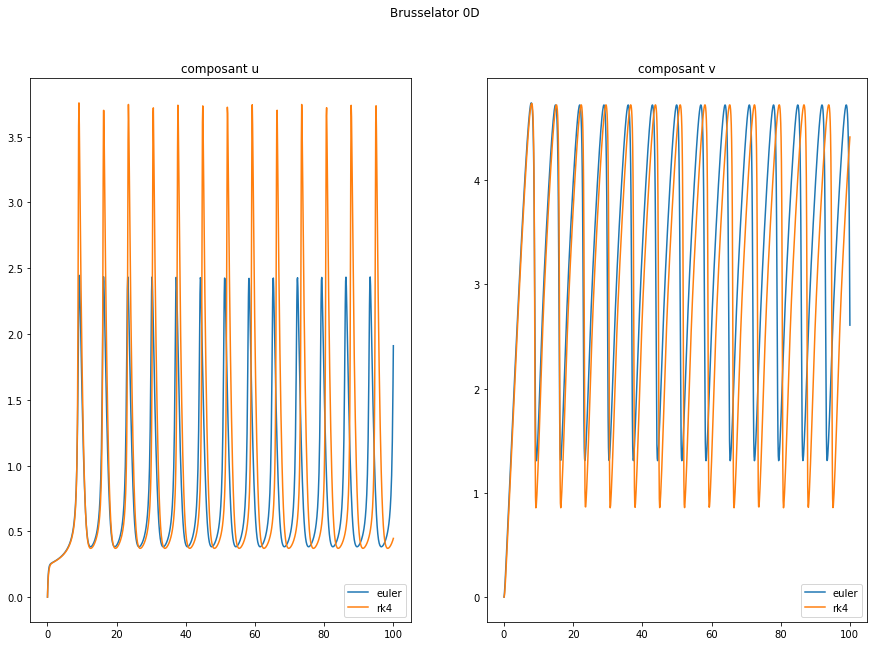

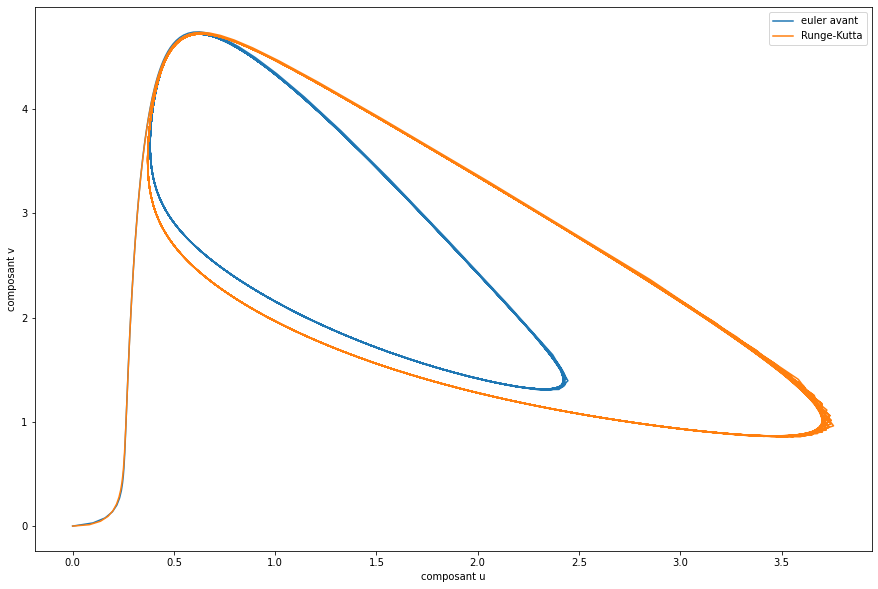

In [12]:
a,b,t = eul_av(1,3,0,0,100,1000)
c,d,t = rk4(1,3,0,0,100,1000)

fig1 = plt.figure(figsize = (15,10))
fig1.suptitle('Brusselator 0D')
ax1 = fig1.add_subplot(121)
ax1.set_title('composant u')
ax1.plot(t,a,label = 'euler')
ax1.plot(t,c,label = 'rk4')
plt.legend()

ax2 = fig1.add_subplot(122)
ax2.set_title('composant v')
ax2.plot(t,b,label = 'euler')
ax2.plot(t,d,label = 'rk4')
plt.legend()

fig2 = plt.figure(figsize = (15,10))
ax3 = fig2.add_subplot(111)
ax3.plot(a,b, label = 'euler avant')
ax3.plot(c,d, label = 'Runge-Kutta')
plt.xlabel('composant u')
plt.ylabel('composant v')
plt.legend()

On voit que les 2 méthodes donnent des résultats radicalement différents. En réalité, la méthode d'euler a tendance à sous évaluer les valeurs réelles, nous allons donc utiliser à présent la méthode de Runge-Kutta. On remarque que le système aborde un comportement ondulatoire. Faisons varier B et observons le système :

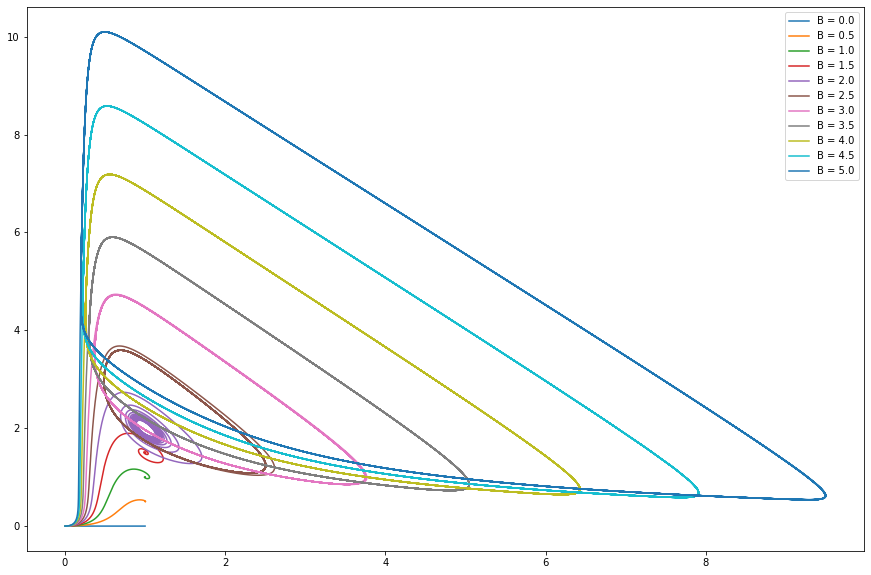

In [70]:
plt.figure(figsize = (15,10))
for i in range(11) :
    u,v,t = rk4(1,i/2,0,0,100,10000)
    ind = 'i'
    plt.plot(u,v, label = 'B = {}'.format(i/2))

plt.legend()

Le système bifurque vers un système cyclique. Il s'agit donc d'une bifurcation de hopf.

## Brusselator 1D

### Théorie

Nous considérons le système suivant :
$$ \frac{du}{dt} = A + u^2 v - Bu - u + D_u \nabla^2 u$$
$$ \frac{dv}{dt} = Bu - u^2 v + D_v\nabla^2 v$$
avec $D_v = 10$.

Il nous faut adapter la méthode 1-SBDF, à savoir
$$ \frac{W_{i+1} - W_i}{k} = F(W_i) + D\nabla^2 W_{i+1}$$
de tel sorte qu'elle soit de l'odre $O(k) + O(h^2)$. Le terme de gauche est déjà d'ordre k, il nous faut établir le terme d'ordre h². Pour cela, nous allons exprimer la dérivée seconde comme ceci :
$$\frac{\partial^2}{\partial x^2}u(x_i,t) = \frac{u(x_{i+1},t) - 2u(x_i,t) + u(x_{i-1},t)}{h^2} + O(h^2) $$
avec $x_i = ih$. Et donc, on aurait pour u
$$ \frac{u(x_{i},t+k) - u(x_i,t)}{k} = F(u(x_i,t) + D_u\frac{u(x_{i+1},t+k) - 2u(x_i,t+k) + u(x_{i-1},t+k)}{h^2}$$
$$ u(x_{i},t+k) - \frac{D_u k}{h^2} \big ( u(x_{i+1},t+k) - 2u(x_i,t+k) + u(x_{i-1},t+k) \big ) = u(x_i,t) + kF(u(x_i,t)$$
$$ \big ( 1 + 2\frac{D_uk}{h^2}\big ) u(x_{i},t+k) - \frac{D_u k}{h^2}u(x_{i+1},t+k) - \frac{D_u k}{h^2}u(x_{i-1},t+k) = u(x_i,t) + kF(u(x_i,t) $$
avec $F(u) = A + u^2v - Bu - u$. On aura donc un système linéaire avec une matrice tridiagonale. Comme nous avons comme conditions aux bords $\frac{\partial}{\partial x} u(0,t) = \frac{\partial}{\partial x} u(L,t) = 0$, on adapte notre système de telle sorte que $u(0,t) - u(x_1,t) = u(L,t) - u(x_{-1},t) = 0$, avec $L=50$.

### Code

Le code est présent dans Brusselator_1D.py, mais il s'agit d'une animation. Comme notebook a du mal à faire tourner des animations sans ass-on, on va intégrer des vidéos.

Observons le système lorsqu'on impose comme paramètres $A=1$, $B=1.3$, $D_u=0.1$.

In [58]:
from IPython.display import Video

Video("test.mp4",embed = True)

In [ ]:
blablabla

Maintanant, avec les paramètres $A=1$, $B=3$, $D_u=10$.

In [13]:
from IPython.display import Video

Video("test.mp4",embed = True)

blablabla

Enfin, avec $A=1$, $B=1.3$, $D_u=10$.

In [15]:
from IPython.display import Video

Video("test.mp4",embed = True)

blablabla